## Importing Data and Packages

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # matplotlib for plotting
import geopandas as gdf # geopandas for plotting maps

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cholera-deaths/polys.shp
/kaggle/input/cholera-deaths/polys.prj
/kaggle/input/cholera-deaths/Pumps.shx
/kaggle/input/cholera-deaths/Pumps.shp
/kaggle/input/cholera-deaths/Cholera_Deaths.shp
/kaggle/input/cholera-deaths/sample.csv
/kaggle/input/cholera-deaths/Pumps.prj
/kaggle/input/cholera-deaths/polys.dbf
/kaggle/input/cholera-deaths/Cholera_Deaths.dbf
/kaggle/input/cholera-deaths/Cholera_Deaths.prj
/kaggle/input/cholera-deaths/Pumps.dbf
/kaggle/input/cholera-deaths/SnowDSM50CM.tif
/kaggle/input/cholera-deaths/Cholera_Deaths.sbx
/kaggle/input/cholera-deaths/polys.cpg
/kaggle/input/cholera-deaths/Cholera_Deaths.shx
/kaggle/input/cholera-deaths/Pumps.sbx
/kaggle/input/cholera-deaths/polys.shx
/kaggle/input/cholera-deaths/Cholera_Deaths.sbn
/kaggle/input/cholera-deaths/SnowMap.tif


## Plotting John Snow's Cholera Map

Plotting John Snow's Cholera Map of deaths and water pumps in Soho neighbourhood, London. 

### Plotting Soho
First, we plot the Soho map as provided by the competition.

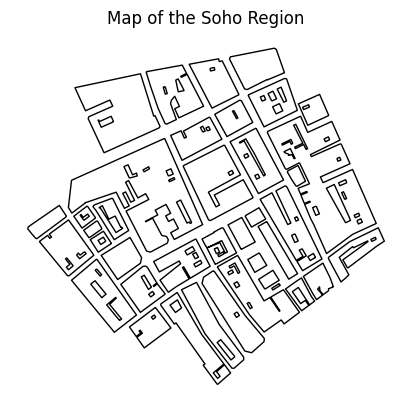

In [2]:
soho_map = gdf.read_file('../input/cholera-deaths/polys.shp') #shape of map

fig, ax = plt.subplots()
soho_map.plot(ax = ax, color='white', edgecolor='black')
ax.set_title('Map of the Soho Region')
ax.set_axis_off()

### Adding Deaths and Pumps

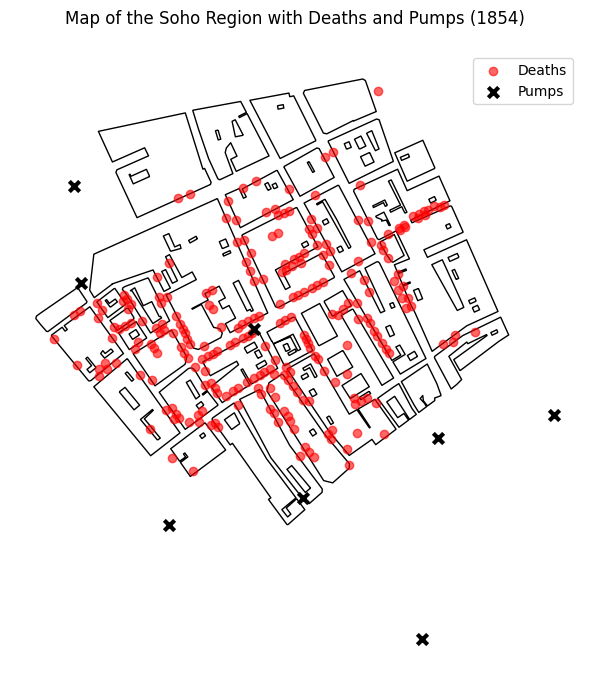

In [3]:
fig, ax = plt.subplots(figsize = (10,8))
soho_map.plot(ax = ax, color='white', edgecolor='black')
deaths = gdf.read_file('../input/cholera-deaths/Cholera_Deaths.shp') #shape of map
pumps = gdf.read_file('../input/cholera-deaths/Pumps.shp') #shape of map
deaths.plot(color='red', ax=ax, alpha = 0.6, label= 'Deaths')
pumps.plot(color='black',  ax=ax, marker='x',linewidths=3, markersize = 55, label= 'Pumps')
ax.legend(loc = 'best')
ax.set_title('Map of the Soho Region with Deaths and Pumps (1854)', pad = 20)
ax.set_axis_off()

## Measuring distance between pumps and deaths. 

Even though the plot was enough for John Snow - and us after seeing it - to design an effective strategy for preventing Cholera deaths, it does not provide us with any quantitative information that associates cholera cases and deaths with water pumps. In order to do this, we will count the number of cases in a 50 meters ratio of water pumps.

First we need to create buffers around each pump to count

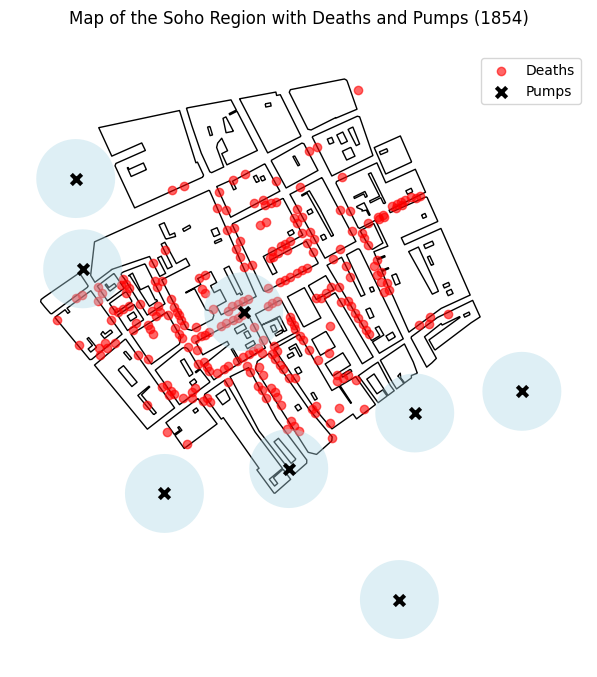

In [4]:
# first we create buffers around each pump to count
pumps['buffer'] = pumps['geometry'].buffer(50)
# plotting this into our previous map, we get
fig, ax = plt.subplots(figsize = (10,8))
soho_map.plot(ax = ax, color='white', edgecolor='black')
deaths.plot(color='red', ax=ax, alpha = 0.6, label= 'Deaths')
pumps['buffer'].plot(color = 'lightblue', alpha = 0.4, ax=ax)
pumps.geometry.plot(color='black',  ax=ax, marker='x',linewidths=3, markersize = 55, label= 'Pumps')
ax.legend(loc = 'best')
ax.set_title('Map of the Soho Region with Deaths and Pumps (1854)', pad = 20)
ax.set_axis_off()

Now we measure deaths in this radius of 50 meters 

In [5]:
dp_list = []
for pump in pumps['buffer']:
    j = 0
    for i in range(deaths.shape[0]):
        j += pump.contains(deaths['geometry'][i])*(deaths['Count'][i])
    dp_list.append(j)

## Uploading the results 

In [6]:
sample=pd.read_csv("../input/cholera-deaths/sample.csv")
sample['Count'] = 0
sample['Count'] = dp_list
sample.set_index('Id_2')

,Count
Id_2,
1,60
2,7
3,0
4,0
5,0
6,8
7,0
8,0


In [7]:
sample.to_csv("sample.csv")